# Assignment 7: Clustering - kmeans
* BMIS 342 - Section: 02
* Name: Nate Yoon
* Due date: 4/17/21 @ Noon
* Purpose: To practice and understand the use of clustering and kmeans

In [2]:
# -- import the libraries --
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# -- load the dataset --
df = pd.read_csv('http://barney.gonzaga.edu/~chuang/data/dmba/Pharmaceuticals.csv')

In [4]:
# .shape returns the number of (rows, columns) in dataframe
df.shape

(21, 14)

In [5]:
# printing first 10 rows of dataframe
df.head(10)

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE


## Exploring The Dataset

### Plotting The Data

In [6]:
# -- extract categorical variables --
X = df[['Market_Cap','Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 
                'Leverage', 'Rev_Growth', 'Net_Profit_Margin']]

## Correlation Analysis - Variables (1-9)

In [7]:
# Extracting the data for variables 1-9
X = df[['Market_Cap','Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 
                'Leverage', 'Rev_Growth', 'Net_Profit_Margin']]

### Showing two different correlation martix to better understand the dataset. The first one shows the precise numbers for each box, but is visually a little overwhelming. The second matrix below is easier to look at a high level for data visualization purposes.

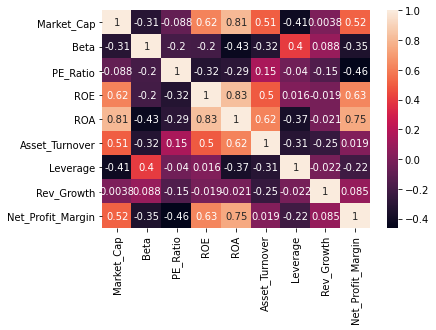

In [8]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.show()

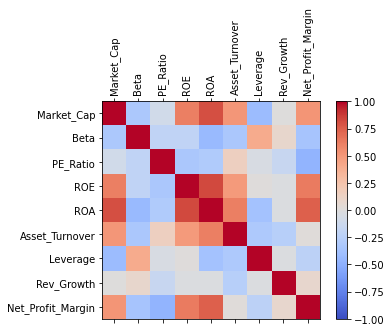

In [8]:
# Correlation Analysis
# We want to show relationship between each of the 9 variables on a -1 to 1 scale
corr = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap = 'coolwarm', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)

# Applying labels for ticks

ax.set_xticks(ticks)
plt.xticks(ticks)

# Rotationg x ticks 90 degrees
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

## Cluster Analysis Section

### For our cluster analysis, we are going to pick Market_Cap and Beta. 

### We are choosing Market_Cap to better understand the total value of the company's shares and size to help understand future risk. 

### We are choosing Beta because we want to further analyze the volatility and risk in correlation to Market_Cap. Looking further into the relationship between different sized companies, breaking down volatility, and determining how it relates to investors decisions/recommendations.

Text(0.5, 1.0, 'Correlation Between Market Cap & Beta')

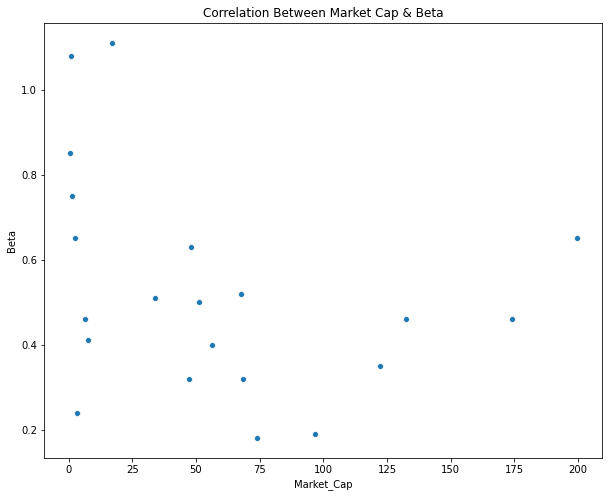

In [9]:
# -- Plot the distribution of Market_Cap and Beta (Scatter plot) --
%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Market_Cap'],
                y=df['Beta'])
plt.title('Correlation Between Market Cap & Beta')

### Standardizing The Data

In [9]:
# -- Using Sklearn --
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Market_Cap','Beta']] = scaler.fit_transform(df[['Market_Cap','Beta']].to_numpy())


In [10]:
# -- Mean --
print(scaler.mean_)

[57.65142857  0.52571429]


In [11]:
# -- Scale alcohol and sugar --
import scipy.stats as stats

z_score = stats.zscore(df[['Market_Cap','Beta']])
z_score

array([[ 0.18864228, -0.82104058],
       [-0.87551801, -0.46183532],
       [-0.8978993 , -0.26227685],
       [ 0.17447912, -0.02280668],
       [-0.18344663, -0.82104058],
       [-0.71255426,  2.3319833 ],
       [-0.11053259, -0.10263007],
       [-1.00088819,  1.29427924],
       [-0.9944186 ,  2.21224822],
       [ 0.28306334, -1.3798043 ],
       [ 1.12708268, -0.70130549],
       [-0.9625952 ,  0.49604535],
       [ 2.03317513, -0.26227685],
       [-0.98707474,  0.89516229],
       [ 1.30980491, -0.26227685],
       [ 0.68190488, -1.33989261],
       [ 2.47975176,  0.49604535],
       [-0.02467937, -0.50174702],
       [-0.4118057 , -0.06271838],
       [-0.95105485, -1.14033413],
       [-0.16543668,  0.41622196]])

In [12]:
# -- Save standardized data into a DataFrame --

X_z = pd.DataFrame(z_score,columns=['Market_Cap_z','Beta_z'])

X_z.head()

,Market_Cap_z,Beta_z
0,0.188642,-0.821041
1,-0.875518,-0.461835
2,-0.897899,-0.262277
3,0.174479,-0.022807
4,-0.183447,-0.821041


## Modeling The Data (K = 3, 4, 5)

In [13]:
# -- fit the model with data --
# -- Creating three clusters --

from sklearn.cluster import KMeans
k1 = 3
kmeans_df1 = KMeans(n_clusters = 3).fit(X_z)

In [14]:
# -- fit the model with data --
# -- Creating four clusters --

from sklearn.cluster import KMeans
k2 = 4
kmeans_df2 = KMeans(n_clusters = 4).fit(X_z)

In [15]:
# -- fit the model with data --
# -- Creating five clusters --

from sklearn.cluster import KMeans
k3 = 5
kmeans_df3 = KMeans(n_clusters = 5).fit(X_z)

## Cluster Properties

In [16]:
# -- Obtain the labels --

label1 = kmeans_df1.labels_

label1

array([1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [17]:
# -- Obtain the labels --

label2 = kmeans_df2.labels_

label2

array([0, 3, 3, 3, 0, 1, 3, 1, 1, 0, 2, 3, 2, 1, 2, 0, 2, 3, 3, 0, 3],
      dtype=int32)

In [18]:
# -- Obtain the labels --

label3 = kmeans_df3.labels_

label3

array([3, 0, 0, 0, 3, 2, 0, 4, 2, 3, 1, 4, 1, 4, 1, 3, 1, 0, 0, 3, 0],
      dtype=int32)

In [19]:
# -- obtain the centroids --
cluster_center1 = kmeans_df1.cluster_centers_
cluster_center1

array([[ 1.73745362, -0.18245346],
       [-0.19102362, -0.54165871],
       [-0.9315062 ,  1.44594368]])

In [20]:
# -- obtain the centroids --

cluster_center2 = kmeans_df2.cluster_centers_
cluster_center2

array([[ 0.0038218 , -1.10042244],
       [-0.92373395,  1.68341826],
       [ 1.73745362, -0.18245346],
       [-0.40924847, -0.06271838]])

In [21]:
# -- obtain the centroids --

cluster_center3 = kmeans_df3.cluster_centers_
cluster_center3

array([[-0.33019893, -0.14254177],
       [ 1.73745362, -0.18245346],
       [-0.85348643,  2.27211576],
       [ 0.0038218 , -1.10042244],
       [-0.98351938,  0.89516229]])

## Combining Data

In [22]:
# -- Merge original data, rescaled data and cluster labels --

clt1 = pd.DataFrame(label1, columns=['label'])

df_cluster1 = pd.concat([X,X_z,clt1],axis=1)

In [24]:
# -- Merge original data, rescaled data and cluster labels --

clt2 = pd.DataFrame(label2, columns=['label'])

df_cluster2 = pd.concat([X,X_z,clt2],axis=1)

In [25]:
# -- Merge original data, rescaled data and cluster labels --

clt3 = pd.DataFrame(label3, columns=['label'])

df_cluster3 = pd.concat([X,X_z,clt3],axis=1)

## 15.2(b). Interpret the clusters with respect to the categorical variables used in forming the clusters.

### Answer: (Cluster Plotting is down below) After plotting cluster analyses for K = 3, 4, 5, we can see a relationship with a smaller market cap there is a higher beta. This means the smaller market cap entails a higher volatilty. The higher the market cap, the beta tends to be on average lower.

## 15.2(c). Is there a pattern in the clusters with respect to the numerical variables (10-12)?

### Answer: Yes, there are several relationships. Usually an investment with a high market cap and a low beta results in a "hold" for Median_Recommendation. Also, a high beta and lower market cap results in a "buy" recommendation. The correlation with location and stock exchange is harder to judge/interpret.

## 15.2(d). Provide an appropriate name for each cluster using any or all of the variables in the dataset.

### Labels:
### 0: Small Cap/Moderate Volatility Investment
### 1: Small Cap/High Volatility Investment
### 2: Medium Cap/Moderate Volatility Investment
### 3: Large Cap/Moderate Volatility Investment
### 4: Large Cap/Low Volatility Investment

## Plot Clusters

## Seaborn

## K = 3

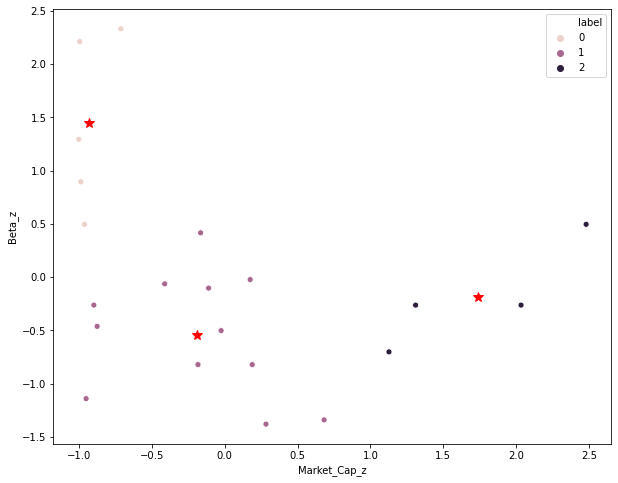

In [26]:
# -- plot clusters --

plt.figure(figsize = (10,8))
sns.scatterplot(df_cluster1['Market_Cap_z'],
               df_cluster1['Beta_z'],
               hue = df_cluster1['label']);

# -- plot centroids of the clusters --

plt.plot(cluster_center1[:,0],
        cluster_center1[:,1],
        'r*',
        markersize = 10);

## K = 4

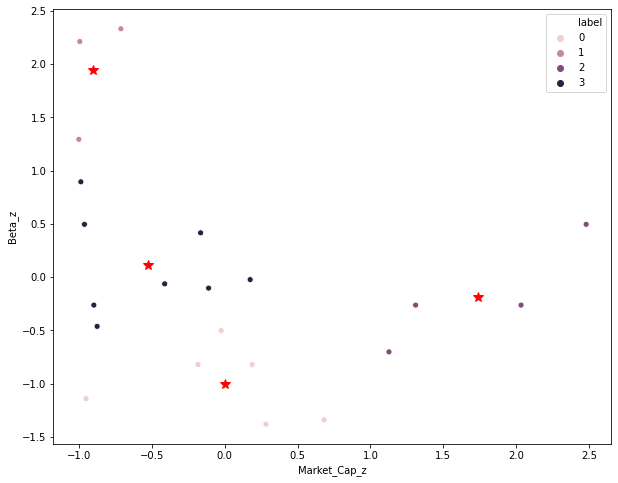

In [27]:
# -- plot clusters --

plt.figure(figsize = (10,8))
sns.scatterplot(df_cluster2['Market_Cap_z'],
               df_cluster2['Beta_z'],
               hue = df_cluster2['label']);

# -- plot centroids of the clusters --

plt.plot(cluster_center2[:,0],
        cluster_center2[:,1],
        'r*',
        markersize = 10);

## K = 5

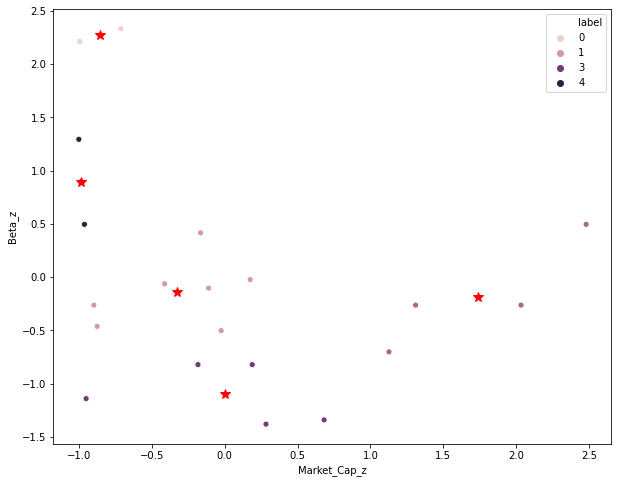

In [28]:
# -- plot clusters --

plt.figure(figsize = (10,8))
sns.scatterplot(df_cluster3['Market_Cap_z'],
               df_cluster3['Beta_z'],
               hue = df_cluster3['label']);

# -- plot centroids of the clusters --

plt.plot(cluster_center3[:,0],
        cluster_center3[:,1],
        'r*',
        markersize = 10);